In [5]:
import pandas as pd
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt


In [6]:
df_cities = pd.read_csv('city.csv').sort_values(by=['population'],ascending=False)

In [85]:
df_cities = df_cities[:30][['address','geo_lat','geo_lon','population']].reset_index()

In [99]:
df_cities

,index,address,geo_lat,geo_lon,population
0,509,г Москва,55.754047,37.620405,11514330
1,786,г Санкт-Петербург,59.939131,30.315900,4848742
2,647,г Новосибирск,55.028191,82.921149,1498921
3,832,г Екатеринбург,56.838522,60.605491,1377738
4,619,г Нижний Новгород,56.324063,44.005391,1250615
5,927,г Казань,55.794358,49.111497,1216965
6,782,г Самара,53.195031,50.106952,1164900
7,656,г Омск,54.984857,73.367452,1154000
8,1064,г Челябинск,55.160262,61.400808,1130273
9,757,г Ростов-на-Дону,47.222457,39.718803,1091544


In [119]:
def draw_paths(path):
    for source, dest in path:
        m.drawgreatcircle(df_cities.iloc[[source]]['geo_lon'], df_cities.iloc[[source]]['geo_lat'],df_cities.iloc[[dest]]['geo_lon'], df_cities.iloc[[dest]]['geo_lat'], linewidth=1);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\user\AppData\Local\Temp/ipykernel_13024/1430525722.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(x,y, 'ok', markersize=5,c='w')


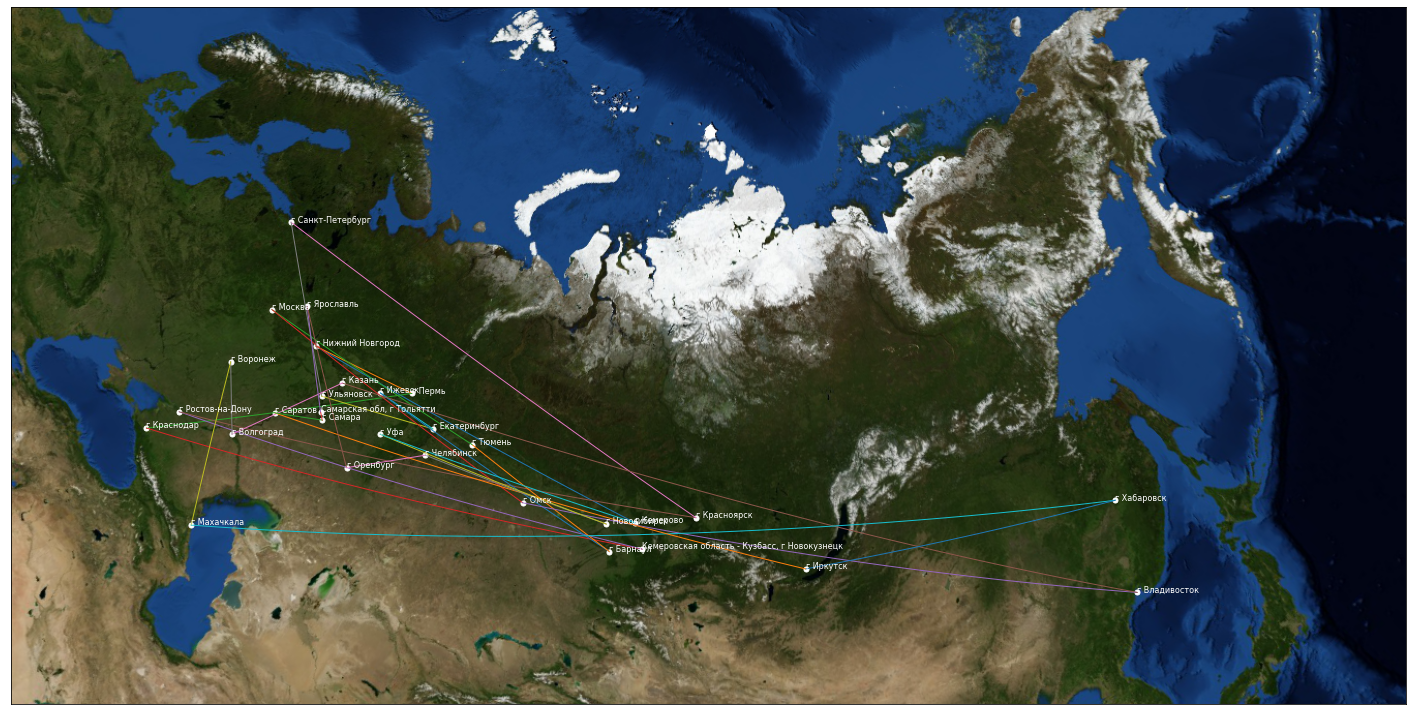

In [123]:
fig = plt.figure(figsize=(25, 15))
m = Basemap(projection='lcc', resolution=None,
            width=10E6, height=5E6, 
            lat_0=66.4167, lon_0=94.2500,)
m.bluemarble()


def plot_cities(cities):
    for index, row in cities.iterrows():
        x,y = m(row['geo_lon'],row['geo_lat'])
        plt.plot(x,y, 'ok', markersize=5,c='w')
        plt.text(x,y, row['address'], fontsize=8,c='w')
    draw_paths(generate_init_path())

plot_cities(df_cities)

In [260]:
import copy

def generate_init_path():
    arr = list(range(0,30))
    # Fisher–Yates shuffle algorithm (taken from https://www.geeksforgeeks.org/shuffle-a-given-array-using-fisher-yates-shuffle-algorithm/)
    for i in range(len(arr)-1,0,-1):
        # Pick a random index from 0 to i
        j = randint(0,i+1)
        # Swap arr[i] with the element at random index
        arr[i],arr[j] = arr[j],arr[i]
    for i in range(0,len(arr)):
        if i != len(arr) - 1:
            arr[i] = [arr[i],arr[i+1]]
        else:
            arr[i] = [arr[i],arr[0][0]]
    return arr

def generate_new_path(x):
    x1 = copy.deepcopy(x)
    swap_city_1, swap_city_2 = randint(0,30),randint(0,30)
    index_swap = -1
    for i in range(len(x1)):
        if x1[i][0] == swap_city_1:
            x1[i][0] = swap_city_2
            index_swap = i
        if x1[i][1] == swap_city_1:
            x1[i][1] = swap_city_2
    for i in range(len(x1)):
        if x1[i][0] == swap_city_2 and (index_swap != i):
            x1[i][0] = swap_city_1
        if x1[i][1] == swap_city_2 and (index_swap != i + 1):
            x1[i][1] = swap_city_1
    return x1

In [273]:
def calculate_dist(path):
    sum_dist = 0
    for pair in path:
        source,dest = pair
        source_x, source_y = m(df_cities.iloc[[source]]['geo_lon'], df_cities.iloc[[source]]['geo_lat'])
        dest_x, dest_y = m(df_cities.iloc[[dest]]['geo_lon'], df_cities.iloc[[dest]]['geo_lat'])
        sum_dist += np.sqrt((source_x - dest_x)**2 + (source_y - dest_y)**2)
    print(sum_dist)
    return sum_dist

In [276]:
def simmulated_annealing(T,x,time_step):
    x_new = generate_new_path(x)
    acceptance_ratio = np.exp((-calculate_dist(x_new)/T) + (calculate_dist(x)/T))
    print((-calculate_dist(x_new)/T) + (calculate_dist(x)/T))
    u = np.random.uniform(0, 1)
    
    if T < 0 :
        return x
    if u <= acceptance_ratio:
        time_step += 1
        T -= 1
        simmulated_annealing(T,time_step,x_new)
    else:
        time_step += 1
        T -= 1        
        simmulated_annealing(T,time_step,x)

In [277]:
simmulated_annealing(10, generate_init_path(),0)

[61270654.22379669]
[64265223.74313515]
[61270654.22379669]
[64265223.74313515]
[299456.95193385]


C:\Users\user\AppData\Local\Temp/ipykernel_13024/2065429567.py:3: RuntimeWarning: overflow encountered in exp
  acceptance_ratio = np.exp((-calculate_dist(x_new)/T) + (calculate_dist(x)/T))


TypeError: object of type 'int' has no len()